In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_curve, roc_auc_score,r2_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import ListedColormap
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
from sklearn.metrics import mean_squared_error
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [44]:
feature = pd.read_csv('classification_feat.csv')
predictor = pd.read_csv('classification_pred.csv', header = 0)
feature['Quarter end'] = pd.to_datetime(feature['Quarter end'])
feature.set_index("Quarter end", inplace=True)
predictor = predictor.drop(columns = 'Unnamed: 0')

## Feature Importance

In [16]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [17]:
def plot_feature_importance(model, x_train, n=27):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center', color = 'Purple')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

### Confusion Matrix Function Plot

In [45]:
labels = ['Growth', 'Value']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Purples):
    
    # Compute confusion matrix
#     cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
#     print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


### ADABOOST CLASSIFIER

In [68]:
## adaboost
ada_clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 5))

In [69]:
# Feautures and Predicted
y = predictor

X  = feature.drop(columns = 'symbol')

In [70]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


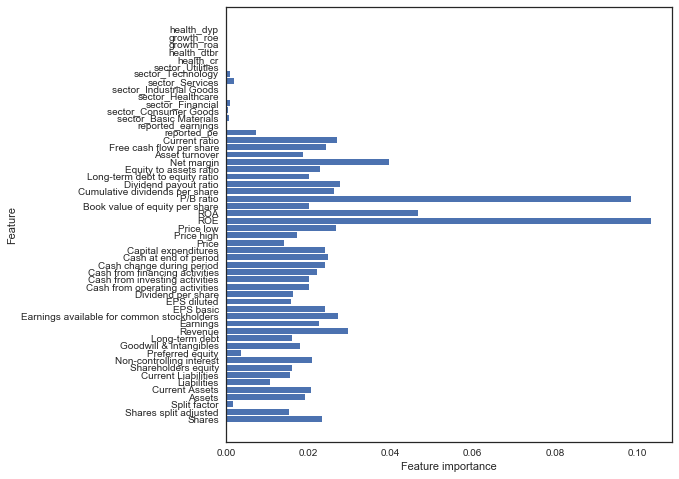

In [71]:
plot_feature_importances(ada_clf.fit(X_train, y_train))

## 1. Model Prep

In [72]:
# Feautures and Predicted
y = predictor

X  = feature

In [73]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
no_symb = X_train.drop(columns = 'symbol')

### Cross Validation

In [66]:
ada_cv_score = cross_val_score(ada_clf, no_symb, y_train, cv=3)
mean_ada_cv_score = np.mean(ada_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_ada_cv_score * 100))

# Mean Cross Validation Score: 89.58%

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Cross Validation Score: 89.54%


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d

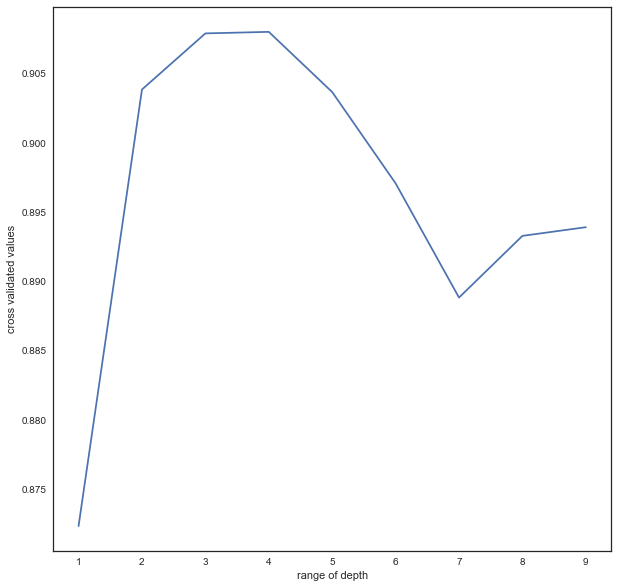

In [25]:
score = cross_val_score(ada_clf, X_train, y_train, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = depth))
    depth_score = cross_val_score(ada_clf, X_train, y_train, cv = 10)
    val.append(depth_score.mean())
# print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

## Model Testing

In [26]:
ada_clf.fit(X_train, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [75]:
no_symtest = X_test.drop(columns='symbol')

In [76]:
test_preds = ada_clf.predict(no_symtest)

In [77]:
#how well did our model predict our correct class? 
accuracy_score(y_test,test_preds)

# 0.8999775901994472

0.8999775901994472

In [50]:
# dot_data = StringIO()
# export_graphviz(ada_clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [32]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')


# Accuracy Score: 0.8913124673190409
# Precision Score: 0.8839694656488549
# Recall Score: 0.8454097463040701
# F1 Score: 0.8642597257206829

#               precision    recall  f1-score   support

#            0       0.90      0.92      0.91      7908
#            1       0.88      0.85      0.86      5479

#     accuracy                           0.89     13387
#    macro avg       0.89      0.88      0.89     13387
# weighted avg       0.89      0.89      0.89     13387

Accuracy Score: 0.8913124673190409
Precision Score: 0.8839694656488549
Recall Score: 0.8454097463040701
F1 Score: 0.8642597257206829

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7908
           1       0.88      0.85      0.86      5479

    accuracy                           0.89     13387
   macro avg       0.89      0.88      0.89     13387
weighted avg       0.89      0.89      0.89     13387



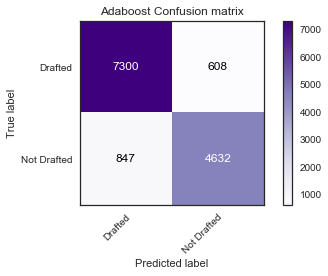

In [36]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Adaboost Confusion matrix')

plt.show()

# print(confusion_matrix(y_test, test_preds, labels=None, sample_weight=None))

##  Standard Scalar AdaBoost

In [37]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model_ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 5))
model_ada.fit(X_train_scaled, y_train)

test_pred_scaled_ada = model_ada.predict(X_test_scaled)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled_ada)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled_ada)}')

# Accuracy Score: 0.9049077463210577
# Precision Score: 0.8947072072072072
# Recall Score: 0.8700492790655229
# F1 Score: 0.8822059776071065

#               precision    recall  f1-score   support

#            0       0.91      0.93      0.92      7908
#            1       0.89      0.87      0.88      5479

#     accuracy                           0.90     13387
#    macro avg       0.90      0.90      0.90     13387
# weighted avg       0.90      0.90      0.90     13387

Accuracy Score: 0.9049077463210577
Precision Score: 0.8947072072072072
Recall Score: 0.8700492790655229
F1 Score: 0.8822059776071065

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7908
           1       0.89      0.87      0.88      5479

    accuracy                           0.90     13387
   macro avg       0.90      0.90      0.90     13387
weighted avg       0.90      0.90      0.90     13387



### Scaled Adaboost Confusion Matrix

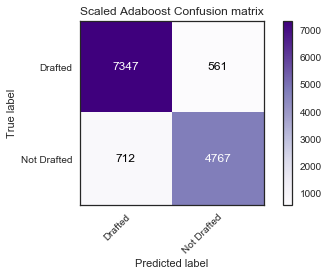

In [39]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled_ada, classes=labels,
                      title='Scaled Adaboost Confusion matrix')

plt.show()

## ADABOOST Grid Search 

In [40]:
dt_grid_param_ada = {'n_estimators': [50, 100, 250],
                     'learning_rate': [1.0, 0.5, 0.1]
                    }

dt_grid_search_ada = GridSearchCV(ada_clf, dt_grid_param_ada, verbose=1, cv=3, n_jobs=-1)

dt_gs_results_ada = dt_grid_search_ada.fit(no_symb, y_train)

# Fitting 3 folds for each of 9 candidates, totalling 27 fits

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 36.0min finished
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
#Predict values based on new parameters
y_pred_acc = dt_grid_search_ada.predict(no_symtest)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(dt_grid_search_ada.best_params_)
print("\nBest Estimator Found:")
print(dt_grid_search_ada.best_estimator_)
print("Best Score Found:")
print(dt_grid_search_ada.best_score_)


# Accuracy Score : 0.9133487711959364
# Precision Score : 0.9075297225891678
# Recall Score : 0.8777149114801971
# F1 Score : 0.8923733531267396
# Best Parameter Found:
# {'learning_rate': 0.1, 'n_estimators': 100}

# Best Estimator Found:
# AdaBoostClassifier(algorithm='SAMME.R',
#                    base_estimator=DecisionTreeClassifier(class_weight=None,
#                                                          criterion='gini',
#                                                          max_depth=9,
#                                                          max_features=None,
#                                                          max_leaf_nodes=None,
#                                                          min_impurity_decrease=0.0,
#                                                          min_impurity_split=None,
#                                                          min_samples_leaf=1,
#                                                          min_samples_split=2,
#                                                          min_weight_fraction_leaf=0.0,
#                                                          presort=False,
#                                                          random_state=None,
#                                                          splitter='best'),
#                    learning_rate=0.1, n_estimators=100, random_state=None)
# Best Score Found:
# 0.9126899444424004

Accuracy Score : 0.9133487711959364
Precision Score : 0.9075297225891678
Recall Score : 0.8777149114801971
F1 Score : 0.8923733531267396
Best Parameter Found:
{'learning_rate': 0.1, 'n_estimators': 100}

Best Estimator Found:
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                      

In [96]:
def performance_model(model, name, plot=False):
    print(name)
    print('-'*20)
    
    print('** TRAINING PERFORMANCE **')
    print('-> Accuracy Score:', accuracy_score(y_train, model.predict(no_symb)) )
    print('-> Precision Score: {}'.format(precision_score(y_train, model.predict(no_symb))))
    print('-> Recall Score: {}'.format(recall_score(y_train, model.predict(no_symb))))
    print('-> F1 Score: {}'.format(f1_score(y_train, model.predict(no_symb))))
    print('-> AUC:', roc_auc_score(y_train, model.predict_proba(no_symb)[:, 1] ))
    
    print('\n** TESTING PERFORMANCE')
    print('-> Accuracy Score:', accuracy_score(y_test, model.predict(no_symtest)) )
    print('-> Precision Score: {}'.format(precision_score(y_test, model.predict(no_symtest))))
    print('-> Recall Score: {}'.format(recall_score(y_test, model.predict(no_symtest))))
    print('-> F1 Score: {}'.format(f1_score(y_test, model.predict(no_symtest))))
    print('-> AUC:', roc_auc_score(y_test, model.predict_proba(no_symtest)[:, 1] ))
    print()
    
    if plot:
        fpr, tpr, thres = roc_curve(y_test, model.predict_proba(no_symtest)[:, 1],pos_label=1)
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, label='Test')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

Adaboost default
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 1.0
-> Precision Score: 1.0
-> Recall Score: 1.0
-> F1 Score: 1.0
-> AUC: 1.0

** TESTING PERFORMANCE
-> Accuracy Score: 0.9133487711959364
-> Precision Score: 0.9075297225891678
-> Recall Score: 0.8777149114801971
-> F1 Score: 0.8923733531267396
-> AUC: 0.9574032750974591



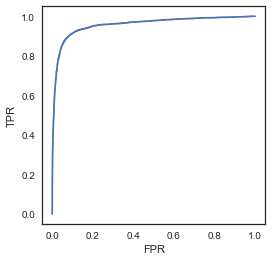

In [101]:
performance_model(dt_gs_results_ada,"Adaboost default",plot=True)

## Adaboost Grid Search Confusion Matrix

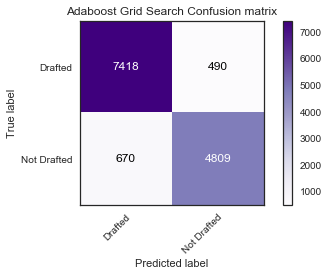

In [42]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Adaboost Grid Search Confusion matrix')

plt.show()

# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_test,y_pred_acc)

## Test Modeling

In [90]:
test_pred_proba = dt_grid_search_ada.predict_proba(no_symtest)
test = X_test.reset_index()
test = test.set_index(['Quarter end', 'symbol'])
predictions = pd.DataFrame(test_pred_proba,index=test.index,columns = ['Growth', 'Value'])
predictions = predictions.reset_index()
predictions = predictions.set_index('Quarter end')

In [129]:
stockz = input('Input a Stock to know if it is Growth or Value: ').upper()
test = predictions[predictions['symbol'] == stockz]
growth = test['Growth'].sum()
value = test['Value'].sum()
if growth > value:
    print(f'Through our fundamental anaylsis: {stockz} is a Growth Stock')
else:
    print(f'Through our fundamental anaylsis: {stockz} is a Value Stock')

Input a Stock to know if it is Growth or Value: nke
Through our fundamental anaylsis: NKE is a Growth Stock


In [160]:
rec_tickers = pd.read_csv('clusters_ticker.csv', sep="\s+")
rect_tickers = rec_tickers['symbol'].tolist()
growth_stock = []
value_stock = []
for ticker in rect_tickers:
    test = predictions[predictions['symbol'] == ticker]
    growth = test['Growth'].sum()
    value = test['Value'].sum()
    if growth > value:
        print(f'Through our fundamental anaylsis: {ticker} is a Growth Stock')
        growth_stock.append(ticker)
    else:
        print(f'Through our fundamental anaylsis: {ticker} is a Value Stock')
        value_stock.append(ticker)

Through our fundamental anaylsis: A is a Value Stock
Through our fundamental anaylsis: AAN is a Growth Stock
Through our fundamental anaylsis: AAP is a Growth Stock
Through our fundamental anaylsis: AAPL is a Growth Stock
Through our fundamental anaylsis: ABBV is a Growth Stock
Through our fundamental anaylsis: ABC is a Growth Stock
Through our fundamental anaylsis: ABMD is a Value Stock
Through our fundamental anaylsis: ABT is a Growth Stock
Through our fundamental anaylsis: ACC is a Value Stock
Through our fundamental anaylsis: ACIW is a Value Stock
Through our fundamental anaylsis: ACM is a Value Stock
Through our fundamental anaylsis: ACN is a Growth Stock
Through our fundamental anaylsis: ADBE is a Value Stock
Through our fundamental anaylsis: ADI is a Growth Stock
Through our fundamental anaylsis: ADM is a Growth Stock
Through our fundamental anaylsis: ADP is a Growth Stock
Through our fundamental anaylsis: ADS is a Value Stock
Through our fundamental anaylsis: ADSK is a Value St

Through our fundamental anaylsis: HCP is a Growth Stock
Through our fundamental anaylsis: HD is a Growth Stock
Through our fundamental anaylsis: HES is a Growth Stock
Through our fundamental anaylsis: HIBB is a Growth Stock
Through our fundamental anaylsis: HIG is a Growth Stock
Through our fundamental anaylsis: HLT is a Growth Stock
Through our fundamental anaylsis: HOG is a Growth Stock
Through our fundamental anaylsis: HOLX is a Value Stock
Through our fundamental anaylsis: HON is a Growth Stock
Through our fundamental anaylsis: HP is a Growth Stock
Through our fundamental anaylsis: HPE is a Value Stock
Through our fundamental anaylsis: HPQ is a Growth Stock
Through our fundamental anaylsis: HRB is a Growth Stock
Through our fundamental anaylsis: HRL is a Growth Stock
Through our fundamental anaylsis: HSIC is a Growth Stock
Through our fundamental anaylsis: HST is a Value Stock
Through our fundamental anaylsis: HSY is a Growth Stock
Through our fundamental anaylsis: HUM is a Growth 

Through our fundamental anaylsis: PSA is a Value Stock
Through our fundamental anaylsis: PSX is a Growth Stock
Through our fundamental anaylsis: PVH is a Growth Stock
Through our fundamental anaylsis: PWR is a Growth Stock
Through our fundamental anaylsis: PXD is a Growth Stock
Through our fundamental anaylsis: PYPL is a Value Stock
Through our fundamental anaylsis: QCOM is a Growth Stock
Through our fundamental anaylsis: QRVO is a Value Stock
Through our fundamental anaylsis: R is a Growth Stock
Through our fundamental anaylsis: RAD is a Value Stock
Through our fundamental anaylsis: RAVN is a Growth Stock
Through our fundamental anaylsis: RCL is a Growth Stock
Through our fundamental anaylsis: RE is a Growth Stock
Through our fundamental anaylsis: REG is a Value Stock
Through our fundamental anaylsis: REGN is a Value Stock
Through our fundamental anaylsis: RF is a Growth Stock
Through our fundamental anaylsis: RHI is a Value Stock
Through our fundamental anaylsis: RIG is a Value Stock

In [165]:
predictions.to_csv('/Users/flatironschool/UrPortfolio/recommendation_system/prediction_gv.csv', index = False)
growth_stock = pd.DataFrame(growth_stock)
value_stock = pd.DataFrame(value_stock)
growth_stock.to_csv('/Users/flatironschool/UrPortfolio/recommendation_system/growth_stocks.csv', index = False)
value_stock.to_csv('/Users/flatironschool/UrPortfolio/recommendation_system/value_stocks.csv', index = False)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes= 16, n_jobs=-1)

In [ ]:
rnd_clf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rnd_clf.predict(X_test)